Assignment on Classification technique 
Every year many students give the GRE exam to get admission in foreign Universities. The 
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating 
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out 
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 
1=yes). Admitted is the target variable.  
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions 
The counselor of the firm is supposed check whether the student will get an admission or not 
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate 
decisions build a machine learning model classifier using Decision tree to predict whether a 
student will get admission or not. 
a) Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if 
necessary.  
b) Perform data-preparation (Train-Test Split) 
c) Apply Machine Learning Algorithm 
d) Evaluate Model.
give ml code for this

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                           classification_report, 
                           confusion_matrix,
                           precision_score,
                           recall_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [22]:
# 1. Load the dataset

data = pd.read_csv('Admission_Predict.csv')
print("Dataset loaded successfully!")



Dataset loaded successfully!


In [3]:
# 2. Data Exploration
print("\n=== Dataset Information ===")
print(f"Shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())
print("\nColumn names:", data.columns.tolist())
print("\nMissing values:\n", data.isnull().sum())


=== Dataset Information ===
Shape: (500, 9)

First 5 rows:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  

Column names: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Missing values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR               

In [4]:
# 3. Data Pre-processing
# Clean column names (remove spaces and special characters)
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('.', '')
print("\nCleaned column names:", data.columns.tolist())



Cleaned column names: ['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']


In [5]:
# Drop unnecessary column if exists
if 'Serial_No' in data.columns:
    data = data.drop('Serial_No', axis=1)


In [6]:
# Convert target variable (assuming 'Chance_of_Admit' is the probability)
data['Admitted'] = (data['Chance_of_Admit'] > 0.5).astype(int)

In [7]:
# 4. Feature Selection (using GRE and CGPA as requested)
features = ['GRE_Score', 'CGPA']
X = data[features]
y = data['Admitted']


In [8]:
# 5. Data Splitting (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

In [9]:
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print("Class distribution in training set:\n", y_train.value_counts(normalize=True))


Training samples: 400
Test samples: 100
Class distribution in training set:
 Admitted
1    0.9225
0    0.0775
Name: proportion, dtype: float64


In [10]:
# 6. Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=10,
    random_state=42
)


In [11]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

In [12]:
# 7. Model Evaluation
# Predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

In [13]:
# Evaluation metrics
print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")


=== Model Evaluation ===
Accuracy: 0.94
Precision: 0.96
Recall: 0.98
F1 Score: 0.97


In [14]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.96      0.98      0.97        92

    accuracy                           0.94       100
   macro avg       0.81      0.74      0.77       100
weighted avg       0.93      0.94      0.94       100



In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[ 4  4]
 [ 2 90]]


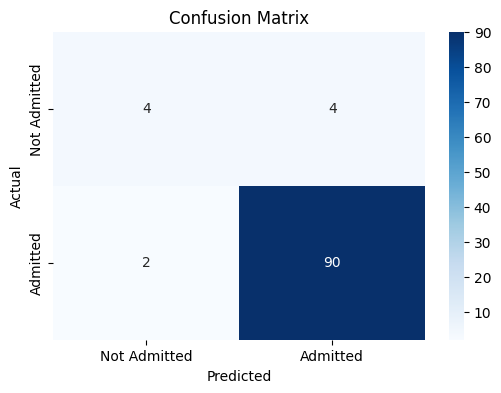

In [16]:
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Admitted', 'Admitted'],
            yticklabels=['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

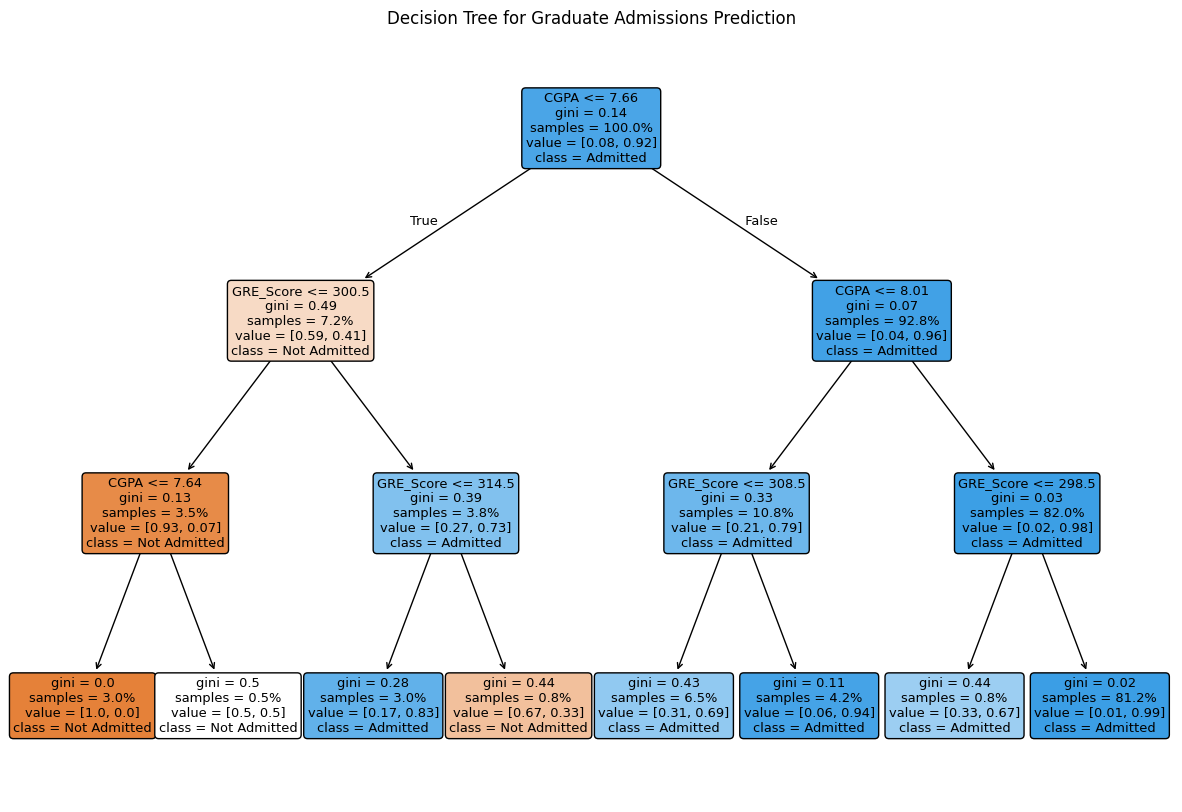

In [17]:
# 8. Decision Tree Visualization
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model,
              feature_names=features,
              class_names=['Not Admitted', 'Admitted'],
              filled=True,
              rounded=True,
              proportion=True,
              precision=2)
plt.title("Decision Tree for Graduate Admissions Prediction")
plt.show()


Feature Importance:
     Feature  Importance
1       CGPA    0.678494
0  GRE_Score    0.321506


C:\Users\yasha\AppData\Local\Temp\ipykernel_18300\549713157.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


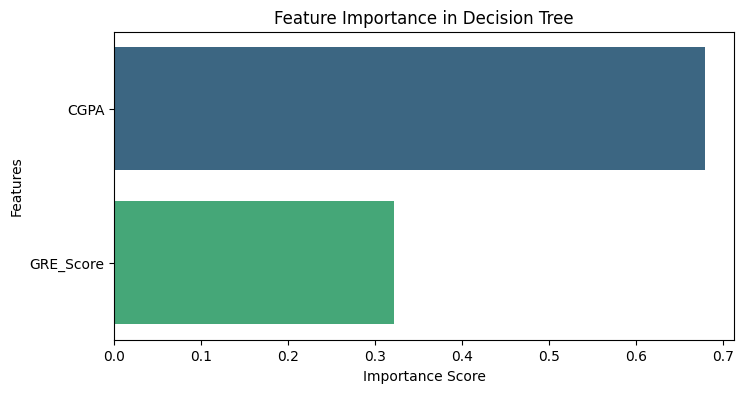

In [18]:
# 9. Feature Importance Analysis
importance = dt_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [19]:
# 10. Decision Boundary Visualization (Optional)
# Create a mesh grid for visualization
gre_range = np.arange(X['GRE_Score'].min()-1, X['GRE_Score'].max()+1, 0.1)
cgpa_range = np.arange(X['CGPA'].min()-0.1, X['CGPA'].max()+0.1, 0.01)
xx, yy = np.meshgrid(gre_range, cgpa_range)

In [20]:
# Predict for each point in mesh grid
Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


C:\Users\yasha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


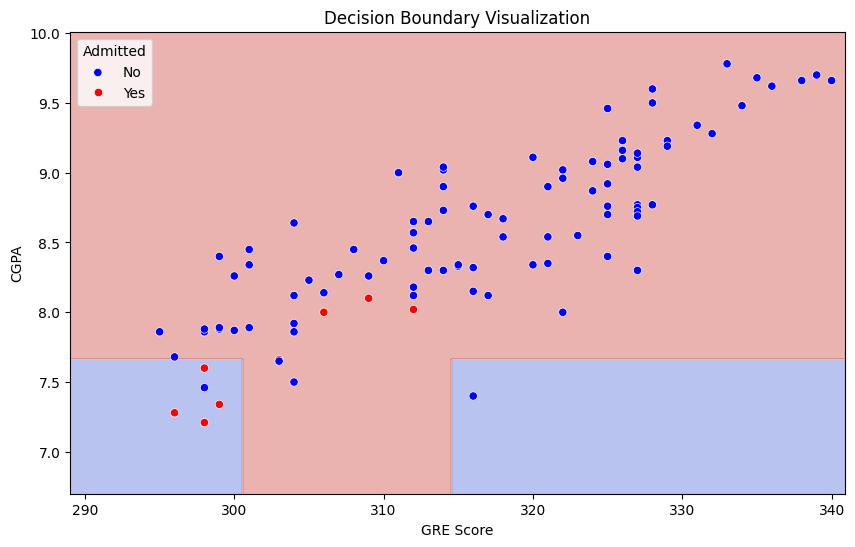

In [21]:
# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
sns.scatterplot(x=X_test['GRE_Score'], y=X_test['CGPA'], hue=y_test, palette={0:'red', 1:'blue'})
plt.title('Decision Boundary Visualization')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend(title='Admitted', labels=['No', 'Yes'])
plt.show()